
# EMNIST **byclass** ‚Äî —Å–æ–≤—Ä–µ–º–µ–Ω–Ω—ã–π —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã–π pipeline (ConvNeXtV2 + —Å–∏–ª—å–Ω—ã–π —Ä–µ—Ü–µ–ø—Ç –æ–±—É—á–µ–Ω–∏—è)

–≠—Ç–æ—Ç –Ω–æ—É—Ç–±—É–∫ –æ–±—É—á–∞–µ—Ç —Ç–æ—á–Ω—É—é –∏ —Å—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω–æ –±—ã—Å—Ç—Ä—É—é –º–æ–¥–µ–ª—å –Ω–∞ **EMNIST (variant: byclass, 62 –∫–ª–∞—Å—Å–∞)** —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Å–æ–≤—Ä–µ–º–µ–Ω–Ω—ã—Ö –ø—Ä–∞–∫—Ç–∏–∫:
- **ConvNeXtV2-Tiny** (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é) c `timm`, –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ –æ–±—É—á–µ–Ω–Ω–∞—è –Ω–∞ ImageNet ‚Äî –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ –∞–¥–∞–ø—Ç–∏—Ä—É–µ—Ç—Å—è –ø–æ–¥ 1 –∫–∞–Ω–∞–ª;
- **AMP (FP16)** –Ω–∞ CUDA, `torch.compile`, **EMA** –≤–µ—Å–æ–≤, **Label Smoothing**, **Mixup/CutMix**, **Random Erasing**;
- **Cosine LR** —Å **warmup**, **gradient clipping**, `channels_last`;
- –í–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã–π —Å–ø–ª–∏—Ç, **–ª—É—á—à–∏–π —á–µ–∫–ø–æ–∏–Ω—Ç**, —Ñ–∏–Ω–∞–ª—å–Ω–∞—è –æ—Ü–µ–Ω–∫–∞ –Ω–∞ **test**;
- –ö–æ—Ä—Ä–µ–∫—Ç–Ω–∞—è –æ—Ä–∏–µ–Ω—Ç–∞—Ü–∏—è EMNIST (–ø–æ–≤–æ—Ä–æ—Ç -90¬∞ + –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω–æ–µ –æ—Ç—Ä–∞–∂–µ–Ω–∏–µ).
  
> –ü–æ —É–º–æ–ª—á–∞–Ω–∏—é —Ä–µ—Ü–µ–ø—Ç—ã —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω—ã –ø–æ–¥ accuracy / —Å–∫–æ—Ä–æ—Å—Ç—å. –ü—Ä–∏ –∂–µ–ª–∞–Ω–∏–∏ –º–æ–∂–Ω–æ —É—Å–∏–ª–∏—Ç—å –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏, —Ä–∞–∑—Ä–µ—à–µ–Ω–∏–µ –∏ –¥–ª–∏–Ω—É –æ–±—É—á–µ–Ω–∏—è –≤ –±–ª–æ–∫–µ –∫–æ–Ω—Ñ–∏–≥—É—Ä–∞—Ü–∏–∏.


In [10]:

# %%capture
# –£—Å—Ç–∞–Ω–æ–≤–∏–º –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ (–µ—Å–ª–∏ –Ω—É–∂–Ω–æ). –í Colab / –ª–æ–∫–∞–ª—å–Ω–æ —Å CUDA —ç—Ç–æ –æ–±—ã—á–Ω–æ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ.
# –ü–µ—Ä–µ–∑–∞–ø—É—Å–∫ —Å—Ä–µ–¥—ã –ù–ï —Ç—Ä–µ–±—É–µ—Ç—Å—è.
import sys, subprocess, pkgutil
def pip_install(pkg):
    if pkg not in {m.name for m in pkgutil.iter_modules()}:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", pkg])

for p in ["timm", "torchmetrics"]:
    pip_install(p)

print("‚úÖ –ó–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –≥–æ—Ç–æ–≤—ã.")


‚úÖ –ó–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –≥–æ—Ç–æ–≤—ã.


In [11]:

import os, math, time, copy, random
from dataclasses import dataclass
from typing import Tuple, Optional

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
from torch.utils.data import DataLoader, random_split, Subset, WeightedRandomSampler
from torch.optim import AdamW
from torch.optim.lr_scheduler import CosineAnnealingLR
from torchvision import datasets, transforms
import torchvision.transforms.functional as TF

import matplotlib.pyplot as plt
import numpy as np

import timm
from timm.data import Mixup
from timm.loss import SoftTargetCrossEntropy, LabelSmoothingCrossEntropy

from torchmetrics.classification import MulticlassAccuracy

# Device
device = "cuda" if torch.cuda.is_available() else ("mps" if torch.backends.mps.is_available() else "cpu")
print("Device:", device)

# Repro
def seed_everything(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = False
    torch.backends.cudnn.benchmark = True

seed_everything(42)


Device: cuda


In [12]:

@dataclass
class CFG:
    data_dir: str = "./data"
    split: str = "byclass"       # –í–ê–ñ–ù–û: –≤–∞—Ä–∏–∞–Ω—Ç EMNIST
    num_classes: int = 62        # byclass = 62 –∫–ª–∞—Å—Å–∞
    img_size: int = 96          # –ú–æ–∂–Ω–æ 96/128/160/192/224; 128 ‚Äî –±—ã—Å—Ç—Ä—ã–π –∏ —Ç–æ—á–Ω—ã–π –∫–æ–º–ø—Ä–æ–º–∏—Å—Å
    batch_size: int = 512        # –ü–æ–¥–±–µ—Ä–∏—Ç–µ –ø–æ–¥ –≤–∞—à—É GPU (–Ω–∞–ø—Ä–∏–º–µ—Ä, 256/384/512/...)
    num_workers: int = 4
    val_ratio: float = 0.05
    epochs: int = 30             # –£–≤–µ–ª–∏—á—å—Ç–µ –¥–æ 20-40 –¥–ª—è –º–∞–∫—Å–∏–º—É–º–∞ –∫–∞—á–µ—Å—Ç–≤–∞
    lr: float = 1e-3             # –±–∞–∑–æ–≤—ã–π LR –ø–æ–¥ AdamW (–±—É–¥–µ—Ç warmup + cosine)
    weight_decay: float = 0.05
    warmup_steps_ratio: float = 0.03  # –¥–æ–ª—è —à–∞–≥–æ–≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ–∫ –Ω–∞ –ª–∏–Ω–µ–π–Ω—ã–π warmup
    min_lr_ratio: float = 0.05        # –ø–æ—Å–ª–µ–¥–Ω–∏–π LR = lr * min_lr_ratio
    grad_clip_norm: float = 2.0
    label_smoothing: float = 0.07
    mixup_alpha: float = 0.2         # 0.0 = –≤—ã–∫–ª; 0.2‚Äì0.4 ‚Äî —Ä–∞–∑—É–º–Ω–æ
    cutmix_alpha: float = 0.0        # –º–æ–∂–Ω–æ 0.5 —Å–æ–≤–º–µ—Å—Ç–Ω–æ —Å mixup
    random_erasing_p: float = 0.1
    weighted_sampling: bool = False   # –í–∫–ª—é—á–∏—Ç–µ, –µ—Å–ª–∏ –∑–∞–º–µ—á–∞–µ—Ç–µ –¥–∏—Å–±–∞–ª–∞–Ω—Å
    ema_decay: float = 0.9997
    use_compile: bool = True
    model_name: str = "convnextv2_tiny"  # –≤–∞—Ä–∏–∞–Ω—Ç—ã: convnextv2_tiny / tf_efficientnetv2_s / resnet50d –∏ –¥—Ä.
    in_chans: int = 1                  # 1 ‚Äî —Å–µ—Ä—ã–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è; timm —É–º–µ–µ—Ç –ø–æ–¥–∫–ª–∞–¥—ã–≤–∞—Ç—å –≤–µ—Å–∞ –∏–∑ 3 –∫–∞–Ω–∞–ª–æ–≤
    fix_emnist_orientation: bool = True
    show_samples: bool = True

cfg = CFG()
print(cfg)


CFG(data_dir='./data', split='byclass', num_classes=62, img_size=96, batch_size=512, num_workers=4, val_ratio=0.05, epochs=30, lr=0.001, weight_decay=0.05, warmup_steps_ratio=0.03, min_lr_ratio=0.05, grad_clip_norm=2.0, label_smoothing=0.07, mixup_alpha=0.2, cutmix_alpha=0.0, random_erasing_p=0.1, weighted_sampling=False, ema_decay=0.9997, use_compile=True, model_name='convnextv2_tiny', in_chans=1, fix_emnist_orientation=True, show_samples=True)


Train: 663036  |  Val: 34896  |  Test: 116323


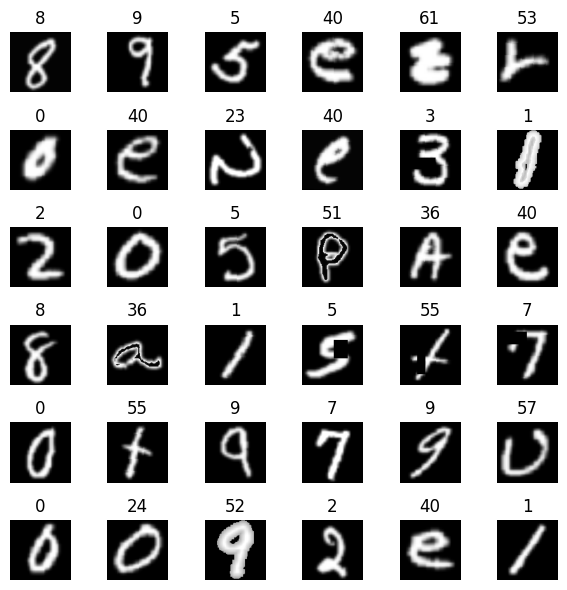

In [13]:

# EMNIST —Ç—Ä–µ–±—É–µ—Ç —Ñ–∏–∫—Å–∞ –æ—Ä–∏–µ–Ω—Ç–∞—Ü–∏–∏ –¥–ª—è "—á–∏—Ç–∞–µ–º–æ–≥–æ" –≤–∏–¥–∞:
# –û—Ñ–∏—Ü–∏–∞–ª—å–Ω–∞—è —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏—è (—Å–º. –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏—é EMNIST/torchvision): –ø–æ–≤–µ—Ä–Ω—É—Ç—å -90¬∞ –∏ –æ—Ç—Ä–∞–∑–∏—Ç—å –ø–æ –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª–∏.
def fix_emnist(img):
    img = TF.rotate(img, -90)    # –ø–æ–≤–µ—Ä–Ω—É—Ç—å –Ω–∞ -90 –≥—Ä–∞–¥—É—Å–æ–≤
    img = TF.hflip(img)          # –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω–æ–µ –æ—Ç—Ä–∞–∂–µ–Ω–∏–µ
    return img

# –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –ø–æ–¥ "–ø—Å–µ–≤–¥–æ-ImageNet" –¥–ª—è 1 –∫–∞–Ω–∞–ª–∞: —Å—Ä–µ–¥–Ω–µ–µ –∏ std —É—Å—Ä–µ–¥–Ω–µ–Ω—ã –ø–æ RGB
IMAGENET_GRAY_MEAN = (0.449,)
IMAGENET_GRAY_STD  = (0.226,)

train_tf_list = []
if cfg.fix_emnist_orientation:
    train_tf_list.append(transforms.Lambda(fix_emnist))

train_tf_list += [
    transforms.Resize((cfg.img_size, cfg.img_size)),
    transforms.Grayscale(num_output_channels=cfg.in_chans),  # –≥–∞—Ä–∞–Ω—Ç–∏—Ä—É–µ–º 1 –∫–∞–Ω–∞–ª
    transforms.RandAugment(num_ops=2, magnitude=3),
    transforms.ToTensor(),
    transforms.RandomErasing(p=cfg.random_erasing_p, scale=(0.02, 0.25), ratio=(0.3, 3.3), value=0.0),
    transforms.Normalize(IMAGENET_GRAY_MEAN, IMAGENET_GRAY_STD),
]

val_tf_list = []
if cfg.fix_emnist_orientation:
    val_tf_list.append(transforms.Lambda(fix_emnist))

val_tf_list += [
    transforms.Resize((cfg.img_size, cfg.img_size)),
    transforms.Grayscale(num_output_channels=cfg.in_chans),
    transforms.ToTensor(),
    transforms.Normalize(IMAGENET_GRAY_MEAN, IMAGENET_GRAY_STD),
]

train_transform = transforms.Compose(train_tf_list)
val_transform = transforms.Compose(val_tf_list)

# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞
train_full = datasets.EMNIST(root=cfg.data_dir, split=cfg.split, train=True, download=True, transform=train_transform)
test_set   = datasets.EMNIST(root=cfg.data_dir, split=cfg.split, train=False, download=True, transform=val_transform)

n_train = len(train_full)
n_val = int(n_train * cfg.val_ratio)
n_tr  = n_train - n_val

train_set, val_set = random_split(train_full, [n_tr, n_val], generator=torch.Generator().manual_seed(42))

print(f"Train: {len(train_set)}  |  Val: {len(val_set)}  |  Test: {len(test_set)}")

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø–∞—Ä—ã —Å—ç–º–ø–ª–æ–≤
if cfg.show_samples:
    import math
    from PIL import Image
    grid_sz = 6
    fig, axes = plt.subplots(grid_sz, grid_sz, figsize=(6,6))
    for ax in axes.ravel():
        idx = random.randrange(len(train_set))
        img, label = train_set[idx]
        # img —Ç–µ–Ω–∑–æ—Ä [C,H,W]; –¥–ª—è –ø—Ä–æ—Å–º–æ—Ç—Ä–∞ —Å–≤–µ—Ä–Ω—ë–º –¥–æ HxW
        ax.imshow(img.squeeze().numpy(), cmap="gray")
        ax.set_title(str(label))
        ax.axis("off")
    plt.tight_layout()
    plt.show()


In [14]:

def make_weighted_sampler(train_subset: Subset, num_classes: int) -> Optional[WeightedRandomSampler]:
    # –°–æ–±–∏—Ä–∞–µ–º labels –∏–º–µ–Ω–Ω–æ –Ω–∞ –ø–æ–¥–º–Ω–æ–∂–µ—Å—Ç–≤–µ train_set
    base_ds = train_subset.dataset  # —ç—Ç–æ train_full (EMNIST train)
    all_targets = torch.as_tensor(base_ds.targets, dtype=torch.long)
    subset_idx = torch.as_tensor(train_subset.indices, dtype=torch.long)
    labels = all_targets.index_select(0, subset_idx)
    counts = torch.bincount(labels, minlength=num_classes).float()
    inv_freq = 1.0 / (counts + 1e-9)
    sample_weights = inv_freq[labels]
    return WeightedRandomSampler(weights=sample_weights.double(),
                                 num_samples=len(sample_weights),
                                 replacement=True)

sampler = make_weighted_sampler(train_set, cfg.num_classes) if cfg.weighted_sampling else None

train_loader = DataLoader(train_set, batch_size=cfg.batch_size,
                          shuffle=(sampler is None), sampler=sampler,
                          num_workers=cfg.num_workers, pin_memory=True, persistent_workers=True)

val_loader   = DataLoader(val_set, batch_size=cfg.batch_size*2,
                          shuffle=False, num_workers=cfg.num_workers,
                          pin_memory=True, persistent_workers=True)

test_loader  = DataLoader(test_set, batch_size=cfg.batch_size*2,
                          shuffle=False, num_workers=cfg.num_workers,
                          pin_memory=True, persistent_workers=True)

steps_per_epoch = math.ceil(len(train_loader))
total_train_steps = steps_per_epoch * cfg.epochs
warmup_steps = int(total_train_steps * cfg.warmup_steps_ratio)

print(f"Steps/epoch: {steps_per_epoch}, total steps: {total_train_steps}, warmup: {warmup_steps}")


Steps/epoch: 1295, total steps: 38850, warmup: 1165


In [15]:

# –°–æ–∑–¥–∞—ë–º –º–æ–¥–µ–ª—å —á–µ—Ä–µ–∑ timm –∏ –∞–¥–∞–ø—Ç–∏—Ä—É–µ–º –ø–æ–¥ –æ–¥–∏–Ω –∫–∞–Ω–∞–ª –∏ 62 –∫–ª–∞—Å—Å–∞.
model = timm.create_model(cfg.model_name, pretrained=True, in_chans=cfg.in_chans, num_classes=cfg.num_classes)

# –ö–∞—á–µ—Å—Ç–≤–æ/—Å–∫–æ—Ä–æ—Å—Ç—å —É–ª—É—á—à–∞–µ—Ç channels_last (–Ω–∞ CUDA)
if device == "cuda":
    model = model.to(memory_format=torch.channels_last)

model = model.to(device)

# –û–ø—Ü–∏–æ–Ω–∞–ª—å–Ω–æ torch.compile –¥–ª—è —É—Å–∫–æ—Ä–µ–Ω–∏—è (PyTorch >= 2.0)
if cfg.use_compile:
    try:
        model = torch.compile(model)
        print("‚úÖ torch.compile –∞–∫—Ç–∏–≤–∏—Ä–æ–≤–∞–Ω")
    except Exception as e:
        print("‚ö†Ô∏è torch.compile –Ω–µ —Å—Ä–∞–±–æ—Ç–∞–ª:", e)

# EMA –∫–æ–Ω—Ç–µ–π–Ω–µ—Ä
class ModelEMA:
    def __init__(self, model: nn.Module, decay: float = 0.9997, device: Optional[str] = None):
        self.ema = copy.deepcopy(model).eval()
        for p in self.ema.parameters():
            p.requires_grad_(False)
        self.decay = decay
        self.device = device
        if device is not None:
            self.ema.to(device)

    @torch.no_grad()
    def update(self, model: nn.Module):
        d = self.decay
        msd = model.state_dict()
        for k, v in self.ema.state_dict().items():
            if v.dtype.is_floating_point:
                v.copy_(v * d + msd[k] * (1.0 - d))
            else:
                v.copy_(msd[k])

model_ema = ModelEMA(model, decay=cfg.ema_decay, device=device)

# # –û–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä, –ª–æ—Å—Å, –º–∏–∫—Å–∞–ø
# optimizer = AdamW(model.parameters(), lr=cfg.lr, weight_decay=cfg.weight_decay, fused=(device=="cuda"))

use_mixup = (cfg.mixup_alpha > 0.0) or (cfg.cutmix_alpha > 0.0)
if use_mixup:
    mixup_fn = Mixup(mixup_alpha=cfg.mixup_alpha, cutmix_alpha=cfg.cutmix_alpha,
                     label_smoothing=cfg.label_smoothing,
                     num_classes=cfg.num_classes)
    criterion = SoftTargetCrossEntropy()
else:
    mixup_fn = None
    criterion = LabelSmoothingCrossEntropy(smoothing=cfg.label_smoothing)


# # –ú–µ—Ç—Ä–∏–∫–∏
acc1_metric_val = MulticlassAccuracy(num_classes=cfg.num_classes, top_k=1).to(device)
acc3_metric_val = MulticlassAccuracy(num_classes=cfg.num_classes, top_k=3).to(device)
acc5_metric_val = MulticlassAccuracy(num_classes=cfg.num_classes, top_k=5).to(device)

acc1_metric_test = MulticlassAccuracy(num_classes=cfg.num_classes, top_k=1).to(device)
acc3_metric_test = MulticlassAccuracy(num_classes=cfg.num_classes, top_k=3).to(device)
acc5_metric_test = MulticlassAccuracy(num_classes=cfg.num_classes, top_k=5).to(device)

print("–ú–æ–¥–µ–ª—å:", cfg.model_name)


‚úÖ torch.compile –∞–∫—Ç–∏–≤–∏—Ä–æ–≤–∞–Ω
–ú–æ–¥–µ–ª—å: convnextv2_tiny


In [16]:
# === Patch: –±–µ–∑–æ–ø–∞—Å–Ω—ã–π AdamW + —Å–æ–≤—Ä–µ–º–µ–Ω–Ω—ã–π AMP ===
import torch, torch.nn as nn
from contextlib import nullcontext
from torch.optim import AdamW
from torch.optim.lr_scheduler import CosineAnnealingLR

# 1) (–û–ø—Ü–∏–æ–Ω–∞–ª—å–Ω–æ, –Ω–æ –ø–æ–ª–µ–∑–Ω–æ –Ω–∞ NVIDIA) —Ä–∞–∑—Ä–µ—à–∏–º TF32 –¥–ª—è —Å–∫–æ—Ä–æ—Å—Ç–∏
if device == "cuda":
    torch.backends.cuda.matmul.allow_tf32 = True
    torch.backends.cudnn.allow_tf32 = True

# 2) –û—Ç–∫–ª—é—á–∞–µ–º fused-—è–¥—Ä–æ —É AdamW -> –∏–∑–±–∞–≤–ª—è–µ–º—Å—è –æ—Ç —Å—Ç—Ä–æ–≥–∏—Ö —Ç—Ä–µ–±–æ–≤–∞–Ω–∏–π –∫ dtype/layout
#    –í–∫–ª—é—á–∞–µ–º foreach (–º—É–ª—å—Ç–∏-—Ç–µ–Ω–∑–æ—Ä–Ω—ã–π –ø—É—Ç—å) ‚Äî –æ–Ω –±—ã—Å—Ç—Ä—ã–π –∏ —É—Å—Ç–æ–π—á–∏–≤—ã–π.
optimizer = AdamW(
    model.parameters(),
    lr=cfg.lr,
    weight_decay=cfg.weight_decay,
    fused=False,
    foreach=True
)

# –ü–µ—Ä–µ—Å–æ–∑–¥–∞—ë–º scheduler —Å –Ω–æ–≤—ã–º optimizer
cosine_scheduler = CosineAnnealingLR(
    optimizer,
    T_max=max(1, total_train_steps - warmup_steps),
    eta_min=cfg.lr * cfg.min_lr_ratio
)

# 3) –°–æ–≤—Ä–µ–º–µ–Ω–Ω—ã–π AMP API (–±–µ–∑ –¥–µ–ø—Ä–µ–∫–µ–π—Ç-–ø—Ä–µ–¥—É–ø—Ä–µ–∂–¥–µ–Ω–∏–π)
amp_dtype = (torch.bfloat16 if (device == "cuda" and torch.cuda.is_bf16_supported()) else torch.float16)

def autocast_ctx():
    return torch.amp.autocast(device_type="cuda", dtype=amp_dtype) if device == "cuda" else nullcontext()

scaler = torch.amp.GradScaler(device="cuda", enabled=(device == "cuda"))

# 4) –ü–µ—Ä–µ–æ–ø—Ä–µ–¥–µ–ª—è–µ–º train_one_epoch c –Ω–æ–≤—ã–º autocast/scaler
def train_one_epoch(epoch: int, global_step: int, scaler):
    model.train()
    running_loss = 0.0
    correct1 = 0
    total = 0
    log_every = max(1, steps_per_epoch // 100)

    for step, (x, y) in enumerate(train_loader):
        # –£–±–µ–¥–∏–º—Å—è, —á—Ç–æ –±–∞—Ç—á–∏ —Ç–æ–∂–µ channels_last (–Ω–µ–º–Ω–æ–≥–æ —É—Å–∫–æ—Ä—è–µ—Ç –Ω–∞ CUDA)
        x = x.to(device, non_blocking=True)
        if device == "cuda":
            x = x.to(memory_format=torch.channels_last)
        y = y.to(device, non_blocking=True)

        # Mixup/CutMix
        if mixup_fn is not None:
            x, y_mix = mixup_fn(x, y)
            targets = y_mix
        else:
            targets = y

        with autocast_ctx():
            out = model(x)
            loss = criterion(out, targets)

        optimizer.zero_grad(set_to_none=True)

        if device == "cuda":
            scaler.scale(loss).backward()
            if cfg.grad_clip_norm and cfg.grad_clip_norm > 0:
                scaler.unscale_(optimizer)
                nn.utils.clip_grad_norm_(model.parameters(), cfg.grad_clip_norm)
            scaler.step(optimizer)
            scaler.update()
        else:
            loss.backward()
            if cfg.grad_clip_norm and cfg.grad_clip_norm > 0:
                nn.utils.clip_grad_norm_(model.parameters(), cfg.grad_clip_norm)
            optimizer.step()

        # EMA –æ–±–Ω–æ–≤–ª—è–µ–º –∫–∞–∫ —Ä–∞–Ω—å—à–µ
        model_ema.update(model)

        # LR warmup + cosine
        global_step += 1
        if global_step <= warmup_steps:
            warmup_lr = cfg.lr * (global_step / max(1, warmup_steps))
            for pg in optimizer.param_groups:
                pg["lr"] = warmup_lr
        else:
            cosine_scheduler.step()

        running_loss += loss.item() * x.size(0)

        if mixup_fn is None:
            preds = out.argmax(dim=1)
            correct1 += (preds == y).sum().item()
            total += y.size(0)

        if (step + 1) % log_every == 0 or (step + 1) == steps_per_epoch:
            if mixup_fn is None and total > 0:
                approx_acc = 100.0 * correct1 / total
                print(f"Epoch {epoch+1} [{step+1}/{steps_per_epoch}]  loss={running_loss/(((step+1)*train_loader.batch_size)):.4f}  acc‚âà{approx_acc:5.2f}%  lr={optimizer.param_groups[0]['lr']:.5f}")
            else:
                print(f"Epoch {epoch+1} [{step+1}/{steps_per_epoch}]  loss={running_loss/(((step+1)*train_loader.batch_size)):.4f}  lr={optimizer.param_groups[0]['lr']:.5f}")

    epoch_loss = running_loss / len(train_loader.dataset)
    return epoch_loss, global_step

print("‚úÖ Patched: non-fused AdamW + torch.amp autocast/GradScaler (BF16 if available)")






@torch.no_grad()
def evaluate(loader, use_ema: bool = True):
    model_to_eval = model_ema.ema if use_ema else model
    model_to_eval.eval()

    total_loss = 0.0
    acc1_metric_val.reset()
    acc3_metric_val.reset()
    acc5_metric_val.reset()

    for x, y in loader:
        x = x.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)
        out = model_to_eval(x)
        loss = F.cross_entropy(out, y)
        total_loss += loss.item() * x.size(0)

        acc1_metric_val.update(out, y)
        acc3_metric_val.update(out, y)
        acc5_metric_val.update(out, y)

    n = len(loader.dataset)
    val_loss = total_loss / n
    acc1 = acc1_metric_val.compute().item() * 100.0
    acc3 = acc3_metric_val.compute().item() * 100.0
    acc5 = acc5_metric_val.compute().item() * 100.0
    return val_loss, acc1, acc3, acc5

best_val_acc = 0.0
best_ckpt_path = "models/best_emnist_model.pth"
best_is_ema = True

global_step = 0
print("üöÄ –°—Ç–∞—Ä—Ç –æ–±—É—á–µ–Ω–∏—è")
start_time = time.time()

scaler = torch.cuda.amp.GradScaler(enabled=(device=="cuda"))

train_history = {"epoch": [], "train_loss": [], "val_loss": [], "val_acc1": [], "val_acc3": [], "val_acc5": []}

for epoch in range(cfg.epochs):
    train_loss, global_step = train_one_epoch(epoch, global_step, scaler)
    val_loss, val_acc1, val_acc3, val_acc5 = evaluate(val_loader, use_ema=True)

    train_history["epoch"].append(epoch+1)
    train_history["train_loss"].append(train_loss)
    train_history["val_loss"].append(val_loss)
    train_history["val_acc1"].append(val_acc1)
    train_history["val_acc3"].append(val_acc3)
    train_history["val_acc5"].append(val_acc5)

    print(f"‚úÖ Epoch {epoch+1}: val_loss={val_loss:.4f}  val_acc@1={val_acc1:.2f}%  val_acc@3={val_acc3:.2f}%  val_acc@5={val_acc5:.2f}%")

    # –°–æ—Ö—Ä–∞–Ω—è–µ–º –ª—É—á—à–∏–π —á–µ–∫–ø–æ–∏–Ω—Ç (–ø–æ –≤–∞–ª–∏–¥. top-1) ‚Äî EMA –≤–µ—Å–∞
    if val_acc1 > best_val_acc:
        best_val_acc = val_acc1
        best_is_ema = True
        torch.save(model_ema.ema.state_dict(), best_ckpt_path)
        print(f"üíæ –û–±–Ω–æ–≤–ª—ë–Ω –ª—É—á—à–∏–π —á–µ–∫–ø–æ–∏–Ω—Ç: {best_ckpt_path} (EMA)")

total_time = (time.time() - start_time) / 60.0
print(f"üèÅ –û–±—É—á–µ–Ω–∏–µ –∑–∞–≤–µ—Ä—à–µ–Ω–æ. –≠–ø–æ—Ö: {cfg.epochs}. –í—Ä–µ–º—è: {total_time:.1f} –º–∏–Ω.")


‚úÖ Patched: non-fused AdamW + torch.amp autocast/GradScaler (BF16 if available)
üöÄ –°—Ç–∞—Ä—Ç –æ–±—É—á–µ–Ω–∏—è


/tmp/ipykernel_6403/2618734621.py:150: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=(device=="cuda"))


Epoch 1 [12/1295]  loss=3.9507  lr=0.00001
Epoch 1 [24/1295]  loss=3.8245  lr=0.00002
Epoch 1 [36/1295]  loss=3.7035  lr=0.00003
Epoch 1 [48/1295]  loss=3.5332  lr=0.00004
Epoch 1 [60/1295]  loss=3.3411  lr=0.00005
Epoch 1 [72/1295]  loss=3.2112  lr=0.00006
Epoch 1 [84/1295]  loss=3.0383  lr=0.00007
Epoch 1 [96/1295]  loss=2.9084  lr=0.00008
Epoch 1 [108/1295]  loss=2.7939  lr=0.00009
Epoch 1 [120/1295]  loss=2.6595  lr=0.00010
Epoch 1 [132/1295]  loss=2.5487  lr=0.00011
Epoch 1 [144/1295]  loss=2.4784  lr=0.00012
Epoch 1 [156/1295]  loss=2.4145  lr=0.00013
Epoch 1 [168/1295]  loss=2.3379  lr=0.00014
Epoch 1 [180/1295]  loss=2.2717  lr=0.00015
Epoch 1 [192/1295]  loss=2.2112  lr=0.00016
Epoch 1 [204/1295]  loss=2.1734  lr=0.00018
Epoch 1 [216/1295]  loss=2.1290  lr=0.00019
Epoch 1 [228/1295]  loss=2.0849  lr=0.00020
Epoch 1 [240/1295]  loss=2.0487  lr=0.00021
Epoch 1 [252/1295]  loss=2.0203  lr=0.00022
Epoch 1 [264/1295]  loss=2.0038  lr=0.00023
Epoch 1 [276/1295]  loss=1.9758  lr=0.00

/tmp/ipykernel_6403/1678829605.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load("models/best_emnist_model.pth", map_location=device)


üìä Test: loss=0.3571  acc@1=78.71%  acc@3=98.83%  acc@5=99.78%
üíæ –°–æ—Ö—Ä–∞–Ω–µ–Ω–æ: models/emnist_byclass_best_ema.pth


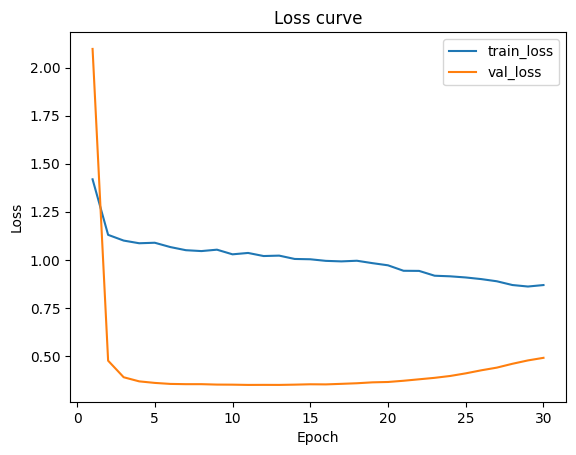

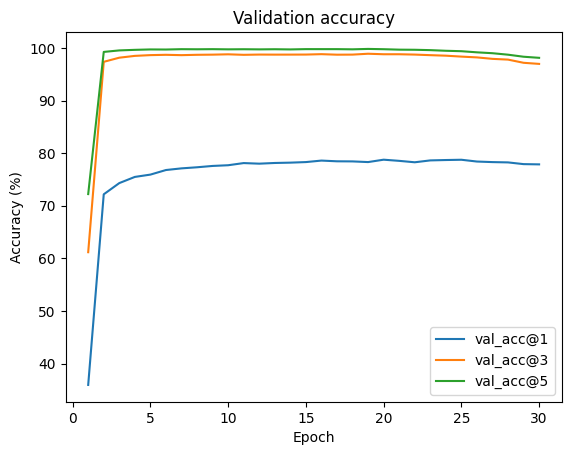

In [17]:

# –ó–∞–≥—Ä—É–∑–∫–∞ –ª—É—á—à–µ–≥–æ —á–µ–∫–ø–æ–∏–Ω—Ç–∞ –≤ EMA-–º–æ–¥–µ–ª—å –∏ —Ñ–∏–Ω–∞–ª—å–Ω–∞—è –æ—Ü–µ–Ω–∫–∞ –Ω–∞ Test
state = torch.load("models/best_emnist_model.pth", map_location=device)
model_ema.ema.load_state_dict(state)

@torch.no_grad()
def evaluate_test():
    model_to_eval = model_ema.ema
    model_to_eval.eval()

    total_loss = 0.0
    acc1_metric_test.reset()
    acc3_metric_test.reset()
    acc5_metric_test.reset()

    for x, y in test_loader:
        x = x.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)
        out = model_to_eval(x)
        loss = F.cross_entropy(out, y)
        total_loss += loss.item() * x.size(0)

        acc1_metric_test.update(out, y)
        acc3_metric_test.update(out, y)
        acc5_metric_test.update(out, y)

    n = len(test_loader.dataset)
    test_loss = total_loss / n
    test_acc1 = acc1_metric_test.compute().item() * 100.0
    test_acc3 = acc3_metric_test.compute().item() * 100.0
    test_acc5 = acc5_metric_test.compute().item() * 100.0
    return test_loss, test_acc1, test_acc3, test_acc5

test_loss, test_acc1, test_acc3, test_acc5 = evaluate_test()
print(f"üìä Test: loss={test_loss:.4f}  acc@1={test_acc1:.2f}%  acc@3={test_acc3:.2f}%  acc@5={test_acc5:.2f}%")

# –°–æ—Ö—Ä–∞–Ω—è–µ–º –ª—É—á—à–∏–π –≤–µ—Å–æ–≤–æ–π —Ñ–∞–π–ª –æ—Ç–¥–µ–ª—å–Ω–æ
final_weights_path = "models/emnist_byclass_best_ema.pth"
torch.save(model_ema.ema.state_dict(), final_weights_path)
print("üíæ –°–æ—Ö—Ä–∞–Ω–µ–Ω–æ:", final_weights_path)

# –ì—Ä–∞—Ñ–∏–∫–∏ (–æ–¥–∏–Ω–æ—á–Ω—ã–π –≥—Ä–∞—Ñ–∏–∫ –Ω–∞ –º–µ—Ç—Ä–∏–∫—É, –±–µ–∑ seaborn, –±–µ–∑ —Ü–≤–µ—Ç–æ–≤)
epochs = train_history["epoch"]
plt.figure()
plt.plot(epochs, train_history["train_loss"], label="train_loss")
plt.plot(epochs, train_history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss curve")
plt.show()

plt.figure()
plt.plot(epochs, train_history["val_acc1"], label="val_acc@1")
plt.plot(epochs, train_history["val_acc3"], label="val_acc@3")
plt.plot(epochs, train_history["val_acc5"], label="val_acc@5")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Validation accuracy")
plt.show()


In [18]:

from PIL import Image
@torch.no_grad()
def predict_image(path: str) -> Tuple[int, np.ndarray]:
    model_ema.ema.eval()
    img = Image.open(path).convert("L")  # grayscale
    if cfg.fix_emnist_orientation:
        img = fix_emnist(img)
    img = img.resize((cfg.img_size, cfg.img_size))
    x = transforms.ToTensor()(img)
    x = transforms.Normalize(IMAGENET_GRAY_MEAN, IMAGENET_GRAY_STD)(x)
    x = x.unsqueeze(0).to(device)
    logits = model_ema.ema(x)
    probs = logits.softmax(dim=1).cpu().numpy()[0]
    pred = int(probs.argmax())
    return pred, probs

print("–ì–æ—Ç–æ–≤–æ –∫ –∏–Ω—Ñ–µ—Ä–µ–Ω—Å—É: –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ predict_image('/path/to/img.png')")


–ì–æ—Ç–æ–≤–æ –∫ –∏–Ω—Ñ–µ—Ä–µ–Ω—Å—É: –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ predict_image('/path/to/img.png')
